In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for run R code in jupyter notebook
import os
os.environ['R_HOME'] = "C:/Users/heung/anaconda3/Lib/R"

# to use R in jupyter notebook
import anndata2ri
import logging
from scipy.sparse import issparse
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

C:\Users\heung\AppData\Local\Temp\ipykernel_59784\1538213386.py:19: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
c:\Users\heung\anaconda3\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
# read in the data

normal_1 = sc.read("../qc_files/normal_1_quality_control.h5ad")
normal_2 = sc.read("../qc_files/normal_2_quality_control.h5ad")
normal_3 = sc.read("../qc_files/normal_3_quality_control.h5ad")
hiv_1 = sc.read("../qc_files/hiv_1_quality_control.h5ad")
hiv_2 = sc.read("../qc_files/hiv_2_quality_control.h5ad")
hiv_3 = sc.read("../qc_files/hiv_3_quality_control.h5ad")

# Shifted logarithm
https://www.sc-best-practices.org/preprocessing_visualization/normalization.html#shifted-logarithm

In [3]:
# normalize the data
normal_1_scales_counts = sc.pp.normalize_total(normal_1, target_sum = None, inplace = False)
normal_1.layers["log1p_norm"] = sc.pp.log1p(normal_1_scales_counts["X"], copy = True)
normal_2_scales_counts = sc.pp.normalize_total(normal_2, target_sum = None, inplace = False)
normal_2.layers["log1p_norm"] = sc.pp.log1p(normal_2_scales_counts["X"], copy = True)
normal_3_scales_counts = sc.pp.normalize_total(normal_3, target_sum = None, inplace = False)
normal_3.layers["log1p_norm"] = sc.pp.log1p(normal_3_scales_counts["X"], copy = True)
hiv_1_scales_counts = sc.pp.normalize_total(hiv_1, target_sum = None, inplace = False)
hiv_1.layers["log1p_norm"] = sc.pp.log1p(hiv_1_scales_counts["X"], copy = True)
hiv_2_scales_counts = sc.pp.normalize_total(hiv_2, target_sum = None, inplace = False)
hiv_2.layers["log1p_norm"] = sc.pp.log1p(hiv_2_scales_counts["X"], copy = True)
hiv_3_scales_counts = sc.pp.normalize_total(hiv_3, target_sum = None, inplace = False)
hiv_3.layers["log1p_norm"] = sc.pp.log1p(hiv_3_scales_counts["X"], copy = True)


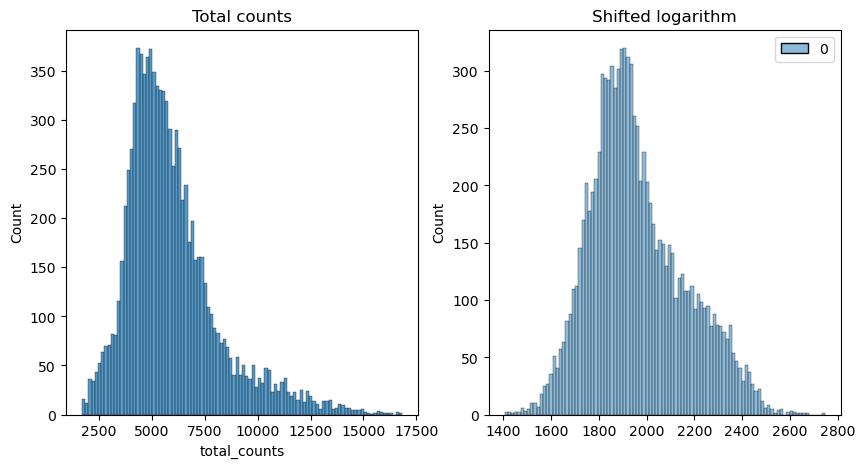

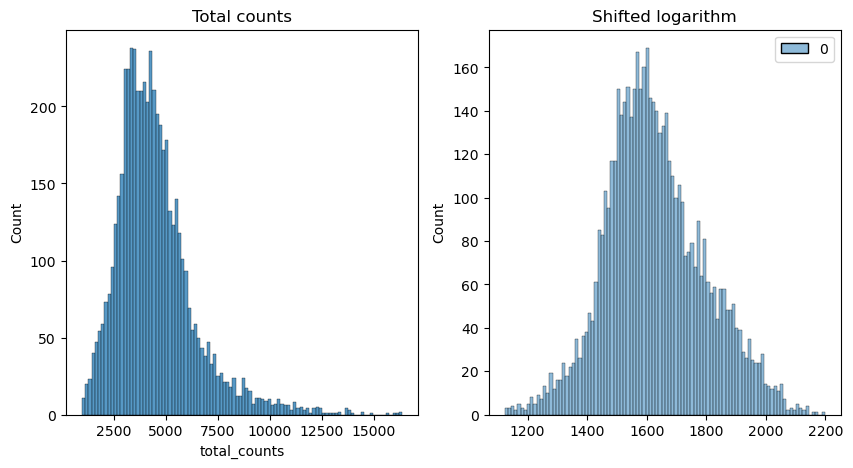

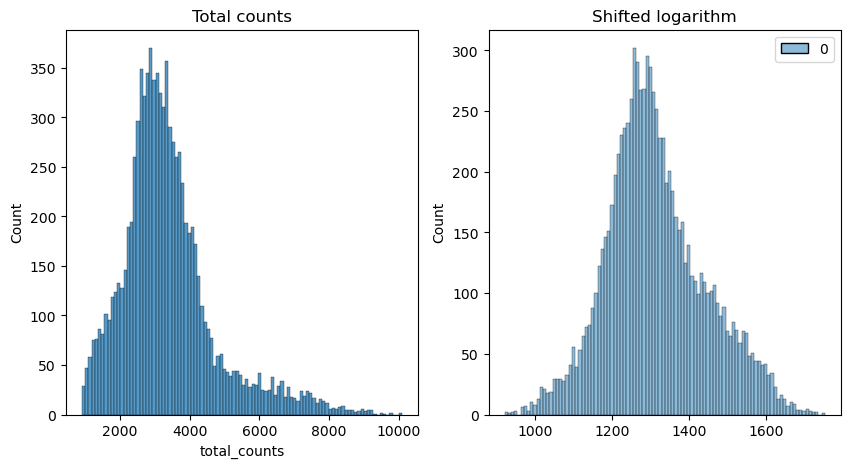

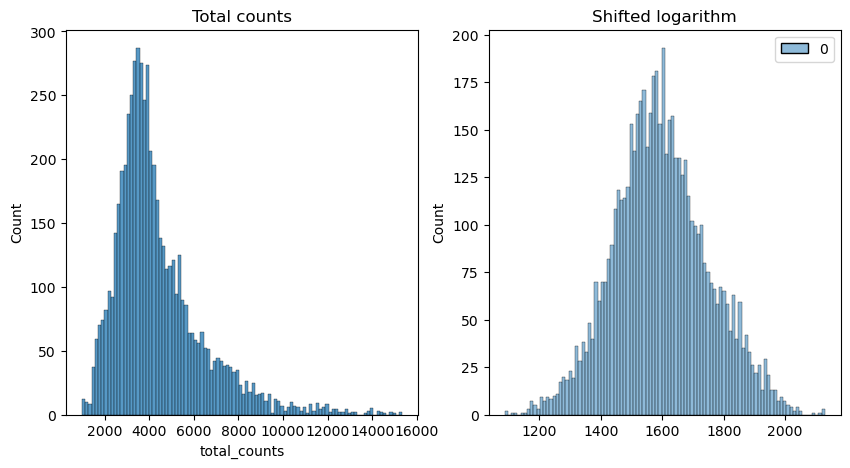

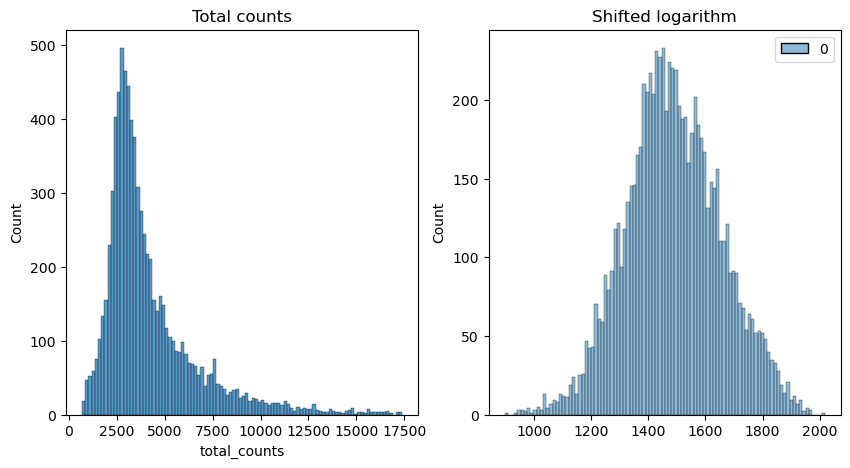

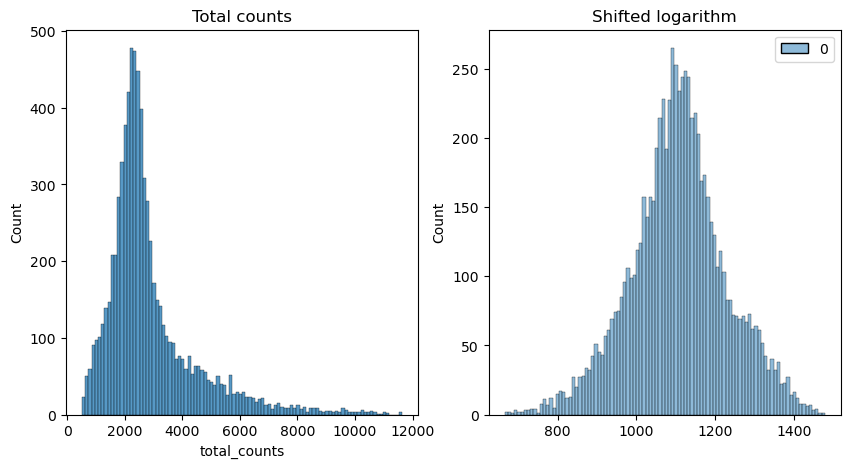

In [4]:
def plot_hist(adata):
    fig, axes = plt.subplots(1, 2, figsize = (10, 5))
    p1 = sns.histplot(adata.obs["total_counts"], bins = 100, kde = False, ax = axes[0])
    axes[0].set_title("Total counts")
    
    p2 = sns.histplot(
        adata.layers["log1p_norm"].sum(1), bins = 100, kde = False, ax = axes[1]
    )
    axes[1].set_title("Shifted logarithm")
    plt.show()

for adata in [normal_1, normal_2, normal_3, hiv_1, hiv_2, hiv_3]:
    plot_hist(adata)

In [5]:
normal_1.write("../normalized/normal_1_normalization.h5ad")
normal_2.write("../normalized/normal_2_normalization.h5ad")
normal_3.write("../normalized/normal_3_normalization.h5ad")
hiv_1.write("../normalized/hiv_1_normalization.h5ad")
hiv_2.write("../normalized/hiv_2_normalization.h5ad")
hiv_3.write("../normalized/hiv_3_normalization.h5ad")